# Pyber Challenge

## Deliverable 0: Prep Data

In [22]:
# magic, dependencies, load data, merge
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates

city = "resources/city_data.csv"
ride = "resources/ride_data.csv"
city_df = pd.read_csv(city)
ride_df = pd.read_csv(ride)

pyber_df = pd.merge(ride_df, city_df, how = "left", on =["city", "city"])

## Deliverable 1: Get a Summary DataFrame 

In [23]:
# 1. Get the total rides for each city type
total_rides = pyber_df.groupby(["type"]).count()[["ride_id"]]

# 2. get the total drivers for each city type
driver_per_city = pyber_df[["type", "city", "driver_count"]]
driver_per_city = driver_per_city.drop_duplicates()

total_drivers = driver_per_city.groupby(["type"]).sum()[["driver_count"]]

#  3. Get the total amount of fares for each city type
total_fares = pyber_df.groupby(["type"]).sum()[["fare"]]

#  4. Get the average fare per ride for each city type.
fare_per_ride = round(pyber_df.groupby(["type"]).sum()["fare"] / pyber_df.groupby(["type"]).count()["ride_id"], 2)

# 5. Get the average fare per driver for each city type. 
fare_per_driver = round(pyber_df.groupby(["type"]).sum()["fare"] / driver_per_city.groupby(["type"]).sum()["driver_count"], 2)

#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([total_rides, total_drivers, total_fares, fare_per_ride, fare_per_driver], axis=1)
pyber_summary_df.columns = ["Total_Rides", "Total_Drivers", "Total_Fares", "Mean_Fare_Ride", "Mean_Fare_Driver"]

#  7 and 8. Cleaning up the DataFrame. Delete the index name + format as necessary
pyber_summary_df.index.name = None
pyber_summary_df["Total_Fares"] = pyber_summary_df["Total_Fares"].map("${:,.2f}".format)
pyber_summary_df["Mean_Fare_Ride"] = pyber_summary_df["Mean_Fare_Ride"].map("${:,.2f}".format)
pyber_summary_df["Mean_Fare_Driver"] = pyber_summary_df["Mean_Fare_Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total_Rides,Total_Drivers,Total_Fares,Mean_Fare_Ride,Mean_Fare_Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [24]:
# 2. get the total drivers for each city type
driver_per_city = pyber_df[["type", "city", "driver_count"]]
driver_per_city = driver_per_city.drop_duplicates()
driver_per_city

,type,city,driver_count
0,Urban,Lake Jonathanshire,5
1,Urban,South Michelleport,72
2,Urban,Port Samanthamouth,57
3,Urban,Rodneyfort,34
4,Urban,South Jack,46
...,...,...,...
2271,Rural,Newtonview,1
2275,Rural,North Jaime,1
2276,Rural,Penaborough,6
2286,Rural,Harringtonfort,4


In [25]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_df.groupby(["type"]).sum()[["fare"]]
total_fares

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [27]:
#  4. Get the average fare per ride for each city type.
fare_per_ride = round(pyber_df.groupby(["type"]).sum()["fare"] / pyber_df.groupby(["type"]).count()["ride_id"], 2)
fare_per_ride

type
Rural       34.62
Suburban    30.97
Urban       24.53
dtype: float64

In [28]:
# 5. Get the average fare per driver for each city type. 
fare_per_driver = round(pyber_df.groupby(["type"]).sum()["fare"] / driver_per_city.groupby(["type"]).sum()["driver_count"], 2)
fare_per_driver

type
Rural       55.49
Suburban    39.50
Urban       16.57
dtype: float64

In [20]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.concat([total_rides, total_drivers, total_fares, fare_per_ride, fare_per_driver], axis=1)
pyber_summary_df.columns = ["Total_Rides", "Total_Drivers", "Total_Fares", "Mean_Fare_Ride", "Mean_Fare_Driver"]

In [21]:
#  7 and 8. Cleaning up the DataFrame. Delete the index name + format as necessary
pyber_summary_df.index.name = None
pyber_summary_df["Total_Fares"] = pyber_summary_df["Total_Fares"].map("${:,.2f}".format)
pyber_summary_df["Mean_Fare_Ride"] = pyber_summary_df["Mean_Fare_Ride"].map("${:,.2f}".format)
pyber_summary_df["Mean_Fare_Driver"] = pyber_summary_df["Mean_Fare_Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total_Rides,Total_Drivers,Total_Fares,Mean_Fare_Ride,Mean_Fare_Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

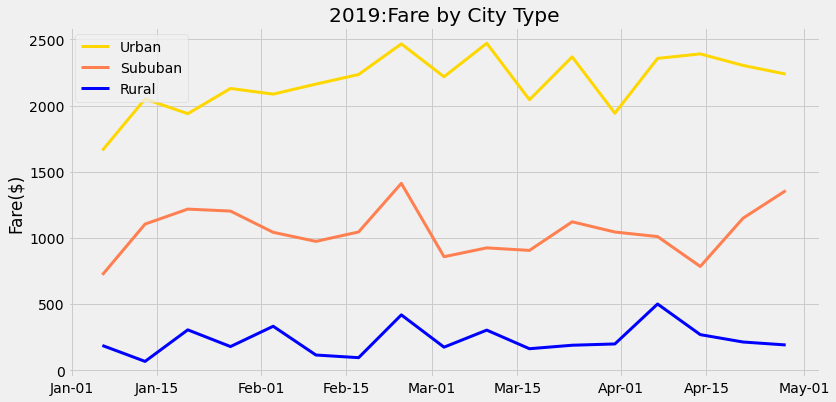

In [10]:
# 1. Read the merged DataFrame
pyber_data_df = pyber_df

# 2. use groupy to assign type date and date as index, sum up fares per city types
fare_per_city_date = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df = pyber_data_df.reset_index()

# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_weekly_df = pyber_data_df.pivot(index = "date", columns = "type" , values = "fare")

# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'
pyber_weekly_df['date'] = pd.to_datetime(pyber_weekly_df.index)
start_date = datetime.datetime(2019, 1, 1)  
end_date = datetime.datetime(2019, 4, 29)

pyber_jan_apr = pyber_weekly_df.loc[(pyber_weekly_df["date"] >= start_date) & (pyber_weekly_df["date"] <= end_date)]
pyber_jan_apr = pyber_jan_apr.drop("date", axis = 1)

# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_jan_apr.index = pd.to_datetime(pyber_jan_apr.index)

# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_resample = pyber_jan_apr.resample('W').sum()

#fare_per_city_date
#pyber_weekly_df
#pyber_jan_apr
#pyber_resample
#pyber_resample

# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.
#pyber_resample['date'] = pd.to_datetime(pyber_resample.index)

from matplotlib import style
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
ax.plot(pyber_resample.index, pyber_resample["Urban"], color="gold", linewidth=3, label='Urban')
ax.plot(pyber_resample.index, pyber_resample["Suburban"], color="coral", linewidth=3, label='Sububan')
ax.plot(pyber_resample.index, pyber_resample["Rural"], color="blue", linewidth=3, label='Rural')

plt.rcParams["figure.figsize"]= (12,6)
plt.title("2019:Fare by City Type")
plt.legend()
plt.ylabel("Fare($)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
plt.savefig('analysis/fare_city_weekly.png')

plt.show()